In [7]:
from copy import copy, deepcopy

import numpy as np
import matplotlib.pyplot as plt

4.

In [ ]:
def numerical_derivative_1d(func, epsilon):


    def deriv_func(x):
        deriv = (func(x + epsilon) - func(x)) / epsilon
        return deriv
    
    deriv_func = lambda x: (func(x + epsilon) - func(x)) / epsilon
    return deriv_func

In [ ]:
def polynom_to_prime(x):
    return 20 * x**5 + x**3 - 5 * x**2 + 2 * x + 2.0


def primed_poly(x):
    return 100 * x** 4 + 3 * x** 2 -10 * x + 2.0

approx_deriv = numerical_derivative_1d(polynom_to_prime, 1e-5)

grid = np.linspace(-2, 2, 100)
right_flag = True
tol = 0.05
debug_print = []

for x in grid:
    estimation_error = abs(primed_poly(x) - approx_deriv(x))
    if estimation_error > tol:
        debug_print.append((estimation_error, primed_poly(x), approx_deriv(x)))
        right_flag = False

if not right_flag:
    print('Что-то не то...')
    print(debug_print)
    plt.plot(grid, primed_poly(grid), label='Истинная производная')
    plt.plot(grid, approx_deriv(grid), label='Численно приближение')
    plt.legend()

print(str(right_flag))

True


5.

In [ ]:
def grad_descent_v1(f, deriv, x0=None, lr=0.1, iters=100, callback=None):


    if x0 is None:
        x0 = np.random.uniform()
    
    
    x = x0
    cnt = iters 
    

In [8]:
def plot_convergence_1d(func, x_steps, y_steps, ax, grid=None, title=""):

    ax.set_title(title, fontsize=16, fontweight="bold")

    if grid is None:
        grid = np.linspace(np.min(x_steps), np.max(x_steps), 100)
    
    fgrid = [func(item) for item in grid]
    ax.plot(grid, fgrid)
    yrange = np.max(fgrid) - np.min(fgrid)

    arrow_kwargs = dict(linestyle="--", color="grey", alpha=0.4)
    for i, _ in enumerate(x_steps):
        if i + 1 < len(x_steps):
            ax.arrow(
                x_steps[i], y_steps[i],
                x_steps[i + 1] - x_steps[i],
                y_steps[i + 1] - y_steps[i],
                **arrow_kwargs
            )
    n = len(x_steps)
    color_list = [(i / n, 0, 0, 1 - i / n) for i in range(n)]
    ax.scatter(x_steps, y_steps, c=color_list)
    ax.scatter(x_steps[-1], y_steps[-1], c='red')
    ax.set_xlabel(r"$x$")
    ax.set_ylabel(r"$y$")


class LoggingCallback:
    

    def __init__(self):
        self.x_steps = []
        self.y_steps = []
    
    def app(self, x, y):
        self.x_steps.append(x)
        self.y_steps.append(y)

def test_convergence_1d(grad_descent, test_cases, tol=1e-2, axes=None, grid=None):


    right_flag = True
    debug_log = []
    for i, key in enumerate(test_cases.keys()):
        answer = test_cases[key]
        test_input = deepcopy(test_cases[key])
        del test_input['answer']
        callback = LoggingCallback()
        res_point = grad_descent(*test_input.values(), callback=callback)

        if axes is not None:
            ax = axes[np.unravel_index(i, shape=axes.shape)]
            x_steps = np.array(callback.x_steps)
            y_steps = np.array(callback.y_steps)
            plot_convergence_1d(
                test_input['func'], x_steps, y_steps,
                ax, grid, key
            )
            ax.axvline(answer, 0, linestyle='--', c='red',
                       label=f'true answer = {answer}')
            ax.axvline(res_point, 0, linestyle='--', c='xkcd:tangerine',
                       label=f'estimate = {np.round(res_point, 3)}')
            ax.legend(fontsize=16)

            if abs(answer - res_point) > tol or np.isnan(res_point):
                debug_log.append(
                    f"Тест '{key}:\n'",
                    f"\t - ответ: {answer}\n",
                    f"\t - вывод алгоритма: {res_point}"
                )
                right_flag = False
        return right_flag, debug_log

TypeError: ignored

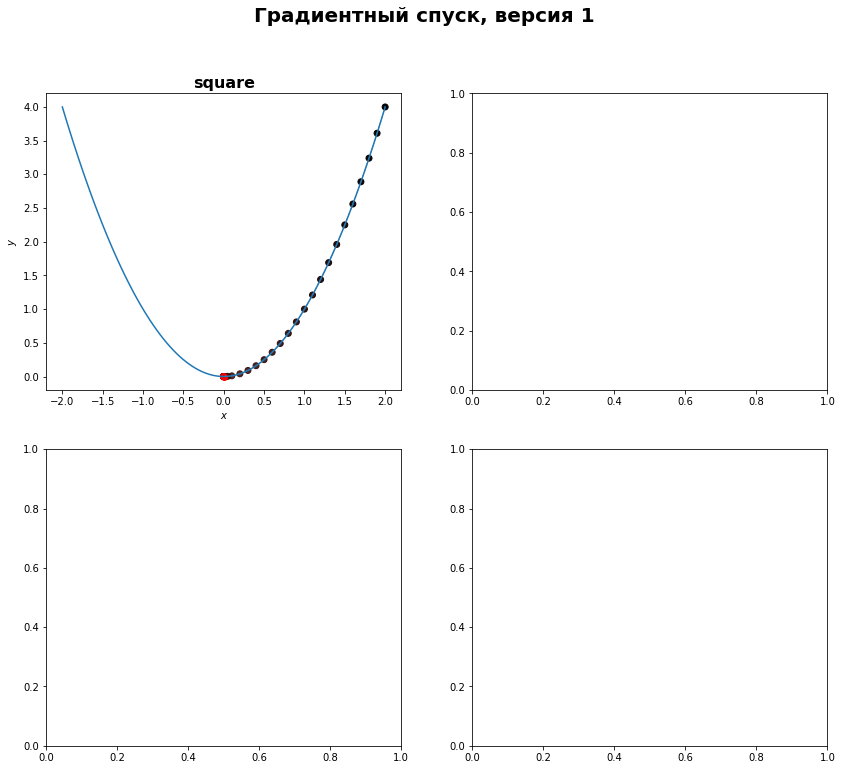

In [ ]:
test_cases = {
    "square": {
        "func" : lambda x: x * x, 
        "deriv" : lambda x: 2 * x, 
        "start" : 2, 
        "answer" : 0.0
    },
    "module": {
        "func" : lambda x: abs(x),  
        "deriv" : lambda x: 1 if x > 0 else -1,
        "start" : 2, 
        "answer" : 0.0
    },
    "third_power": {
        "func" : lambda x: abs((x - 1)**3),
        "deriv" : lambda x: 3 * (x - 1)**2 * np.sign(x-1),
        "start" : -1, 
        "answer" : 1.0
    },
    "ln_x2_1": {
        "func" : lambda x: np.log((x + 1)**2 + 1),  
        "deriv" : lambda x: 2 * (x + 1) / (x**2 +1), 
        "start" : 1, 
        "answer" : -1.0
    }
}



tol = 1e-2  # желаемая точность 
fig, axes = plt.subplots(2,2, figsize=(14, 12))
fig.suptitle("Градиентный спуск, версия 1", fontweight="bold", fontsize=20)
grid = np.linspace(-2, 2, 100)

is_correct, debug_log = test_convergence_1d(
    grad_descent_v1, test_cases, tol, 
    axes, grid
)
if not is_correct:
    print("Не сошлось. Дебажный вывод:")
    for log_entry in debug_log:
        print(log_entry)

6.Вычислить градиент функциии

In [1]:
from math import sin, cos, tan, exp, sqrt, pi
import numpy as np

def grad_1(x, y, z):

    dx = z * cos(x * z) * np.pow(exp, x)
    dy = 2 * y * z
    dz = x * cos(x * z) - y * y
    return (dx, dy, dz)

7.Вычислить градиент функции

In [ ]:
def grad_2(x, y, z):

    dx = -sin(np.exp(x + y)) * np.exp(y) / cos(np.exp(x + y)) - 1/x
    dy = -sin(np.exp(x + y)) * np.exp(x) / cos(np.exp(x + y)) - 1/y
    return (dx, dy, 0)

8...

In [35]:
def numerical_derivative_2d(func, epsilon):

    def grad_func(x):
        xx, yy = x
        dx = (func((xx + epsilon, yy)) - func(x)) / epsilon
        dy = (func((xx, yy + epsilon)) - func(x)) / epsilon
        return (dx, dy)
    
    return grad_func


def grad_descent_2d(func, low=None, high=None,  start=None, callback=None):

    if start is None:
        start = np.random.randn(2)
    
    eps = 1e-10
    df = numerical_derivative_2d(func, eps)
    cnt = 1000
    x = start 
    lr1 = 0.5
    lr2 = 0.5
    while cnt > 0:
        px = x
        if sum(df(x)) == 0:
            break
        if df(x)[0] < 0:
            x = x[0] + lr1, x[1]
        else:
            x = x[0] - lr1, x[1]
        if df(x)[0] * df(px)[0] < 0:
            lr1 /= 2
        if df(x)[1] < 0:
            x = x[0], x[1] + lr2
        else:
            x = x[0], x[1] - lr2
        if df(x)[0] * df(px)[0] < 0:
            lr2 /= 2
        cnt -= 1
        callback()
    return x

In [36]:
def plot_convergence_2d(func, steps, ax, xlim, ylim, cmap='viridis', title=""):

    ax.set_title(title, fontsize=20, fontweight='bold')
    xrange = np.linspace(*xlim, 100)
    yrange = np.linspace(*ylim, 100)
    grid = np.meshgrid(xrange, yrange)
    X, Y = grid
    fvalues = func(
        np.dstack(grid).reshape(-1, 2)
    ).reshape((xrange.size, yrange.size))
    ax.pcolormesh(xrange, yrange, fvalues, cmap=cmap, alpha=0.8)
    CS = ax.contour(xrange, yrange, fvalues)
    ax.clabel(CS, CS.levels, inline=True)
    arrow_kwargs = dict(linestyle="--", color='black', alpha=0.8)
    for i, _ in enumerate(steps):
        if i + 1 < len(steps):
            ax.arrow(
                *steps[i],
                *(steps[i + 1] - steps[i]),
                **arrow_kwargs
            )
    n = len(steps)
    color_list = [(i / n, 0, 0, 1 - i / n) for i in range(n)]
    ax.scatter(steps[:, 0], steps[:, 1], c=color_list, zorder=10)
    ax.scatter(steps[-1, 0], steps[-1, 1],
               color="red", label=f"estimate = {np.round(steps[-1], 2)}")
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    ax.set_ylabel("$y$")
    ax.set_xlabel("$x$")
    ax.legend(fontsize=16)

In [37]:
def test_convergence_2d(grad_descent_2d, test_cases, tol, axes=None):


    class LoggingCallback:
    

        def __init__(self):
            self.x_steps = []
            self.y_steps = []
        
        def app(self, x, y):
            self.x_steps.append(x)
            self.y_steps.append(y)


    right_flag = True
    debug_log = []
    for i, key in enumerate(test_cases.keys()):
        answer = test_cases[key]["answer"]
        test_input = deepcopy(test_cases[key])
        del test_input["answer"]
        callback = LoggingCallback
        res_point = grad_descent_2d(**test_input, callback=callback)
        if axes is not None:
            ax = axes[np.unravel_index(i, shape=axes.shape)]
            plot_convergence_2d(
                np.vectorize(test_input["func"], signature="(n)->()"),
                np.vstack(callback.x_steps),
                ax=ax,
                xlim=(test_input["low"], test_input["high"]),
                ylim=(test_input["low"], test_input["high"]),
                title=key 
            )
        if np.linalg.norm(answer - res_point, ord=1) > tol:
            debug_log.append(
                f"Тест '{key}':\n"
                f"\t- ответ: {answer}\n"
                f"\t- вывод алгоритма: {res_point}"
            )
            right_flag = False
    return right_flag, debug_log


TypeError: ignored

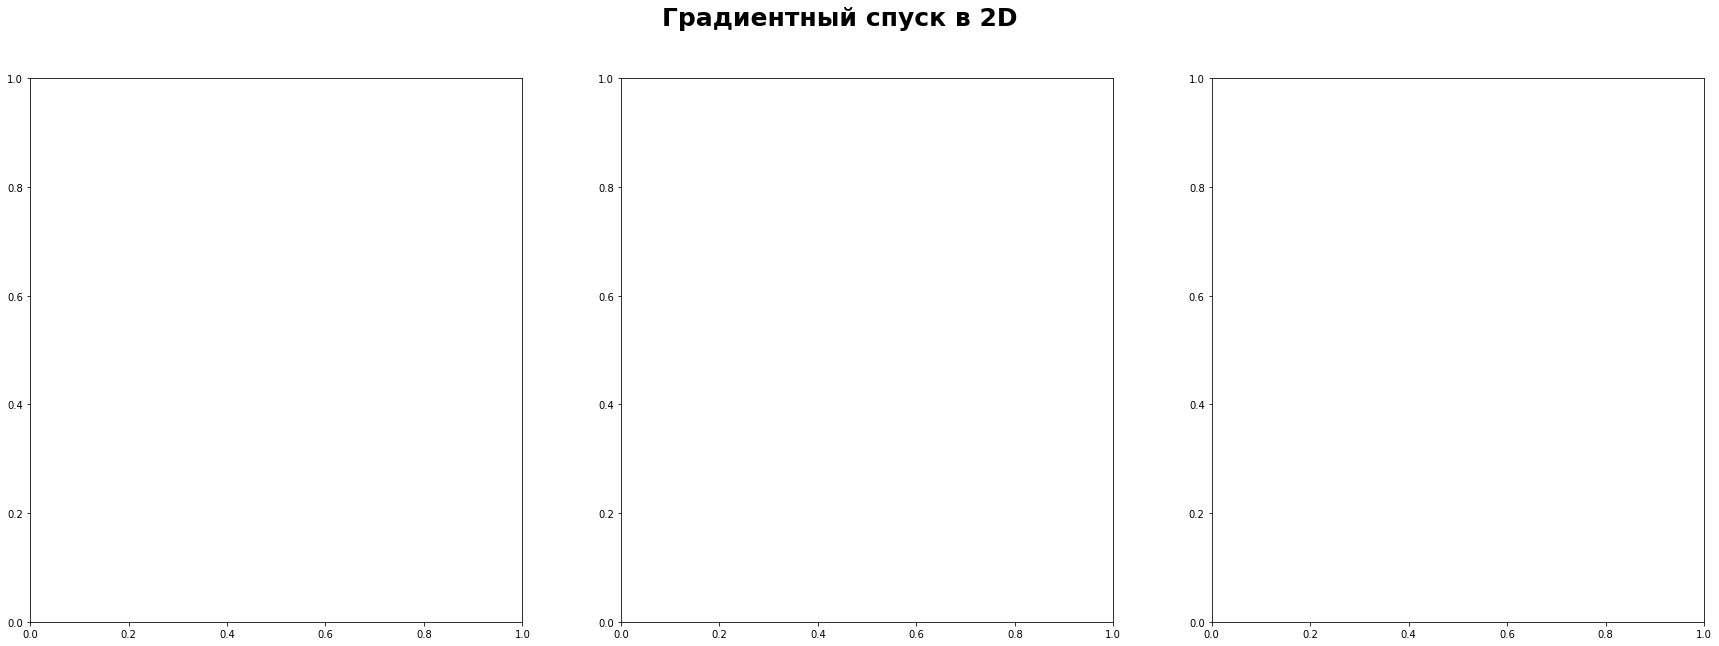

In [38]:
test_cases = {
    "concentirc_circles" : {
        "func" : lambda x: (
            -1 / ((x[0] - 1) ** 2  + (x[1] - 1.5) ** 2 + 1)
            * np.cos(2 * (x[0] - 1) ** 2 + 2 * (x[1] - 1.5) ** 2)
        ),
        "start": np.array([.2, .7]),
        "answer": np.array([1, 1.5])
    },
    "other concentric circles": {
        "func": lambda x: (
            -1 / ((x[0]) ** 2 + (x[1] - 3) ** 2 + 1)
            * np.cos(2 * (x[0]) ** 2 + 2 * (x[1] - 3) ** 2)
        ),
        "start": np.array([1.1, 3.3]),
        "answer": np.array([0, 3])
    },
    "straightened ellipses": {
        "func" : lambda x: (
            -1 / ((x[0]) ** 4 + (x[1] - 3) ** 6 + 1)
            * np.cos(2 * (x[0]) ** 4 + 2 * (x[1] - 3) ** 6)
        ),
        "start": np.array([.8, 3.001]),
        "answer": np.array([0, 3])
    },
}
tol = 1e-2
fig, axes = plt.subplots(1, 3, figsize=(30, 10), squeeze=False)
fig.suptitle("Градиентный спуск в 2D", fontsize=25, fontweight="bold")
is_correct, debug_log = test_convergence_2d(grad_descent_2d, test_cases, tol, axes)

if not is_correct:
    print("Не сошлось. Дебажный вывод:")
    for log_entry in debug_log:
        print(log_entry)